# Importing Libraries

In [1]:
import re
from collections import Counter

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import regexp_tokenize
from nltk import pos_tag, RegexpParser
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

# Text

In [2]:
text = open('illiad.txt', encoding = 'utf-8').read()

# Preprocessing

## Noise Removal

In [3]:
text = re.sub(r'\n', ' ', text)

## Lowering

In [4]:
text = text.lower()

# Sentence Tokenization

In [5]:
sentences = sent_tokenize(text)

# Word Tokenization

In [6]:
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

# Part-Of-Speech Tagging

In [8]:
tagged = [pos_tag(tokenized_sentence) for tokenized_sentence in tokenized_sentences]

In [9]:
print(tagged[222])

[('we', 'PRP'), ('are', 'VBP'), ('perpetually', 'RB'), ('labouring', 'VBG'), ('to', 'TO'), ('destroy', 'VB'), ('our', 'PRP$'), ('delights', 'NNS'), (',', ','), ('our', 'PRP$'), ('composure', 'NN'), (',', ','), ('our', 'PRP$'), ('devotion', 'NN'), ('to', 'TO'), ('superior', 'JJ'), ('power', 'NN'), ('.', '.')]


In [10]:
print(tagged[223])

[('of', 'IN'), ('all', 'PDT'), ('the', 'DT'), ('animals', 'NNS'), ('on', 'IN'), ('earth', 'NN'), ('we', 'PRP'), ('least', 'VBP'), ('know', 'VB'), ('what', 'WP'), ('is', 'VBZ'), ('good', 'JJ'), ('for', 'IN'), ('us', 'PRP'), ('.', '.')]


# Parsing

# NP-Chunking

- Noun Phrase: An optional determiner `DT`, followed by any number of adjectives `JJ`, followed by a noun `NN`.

In [11]:
NP_Chunk_Grammer = "NP: {<DT>?<JJ>*<NN>}"

In [12]:
NP_Chunk_Parser = RegexpParser(NP_Chunk_Grammer)

In [13]:
NP_Chunked_Text = [NP_Chunk_Parser.parse(sentence) for sentence in tagged]

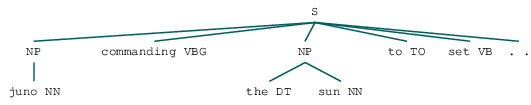

In [14]:
NP_Chunked_Text[80]

In [15]:
NP_Chunked_Text[80].subtrees

<bound method Tree.subtrees of Tree('S', [Tree('NP', [('juno', 'NN')]), ('commanding', 'VBG'), Tree('NP', [('the', 'DT'), ('sun', 'NN')]), ('to', 'TO'), ('set', 'VB'), ('.', '.')])>

In [16]:
NP_Chunks = []

for chunked_sentence in NP_Chunked_Text:
    for subtree in chunked_sentence.subtrees(filter = lambda x: x.label() == 'NP'):
        NP_Chunks.append((tuple(subtree)))

# VP-Chunking

- Verp Phrase: A noun phrase, followed by a verb `VB`, followed by an optional adverb `RB`.

In [17]:
VP_Chunk_Grammer = "VP: {<DT>?<JJ>*<NN><VB.*><RB.?>?}"

In [18]:
VP_Chunk_Parser = RegexpParser(VP_Chunk_Grammer)

In [19]:
VP_Chunked_Text = [VP_Chunk_Parser.parse(sentence) for sentence in tagged]

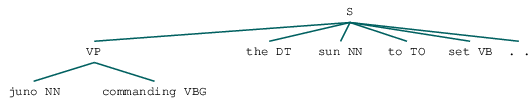

In [20]:
VP_Chunked_Text[80]

In [21]:
VP_Chunked_Text[80].subtrees

<bound method Tree.subtrees of Tree('S', [Tree('VP', [('juno', 'NN'), ('commanding', 'VBG')]), ('the', 'DT'), ('sun', 'NN'), ('to', 'TO'), ('set', 'VB'), ('.', '.')])>

In [22]:
VP_Chunks = []

for chunked_sentence in VP_Chunked_Text:
    for subtree in chunked_sentence.subtrees(filter = lambda x: x.label() == 'VP'):
        VP_Chunks.append((tuple(subtree)))

# Chunks Counter

In [23]:
NP_Chunks_Counter = Counter()

In [24]:
VP_Chunks_Counter = Counter()

## Couning NP Chunks

In [25]:
for chunk in NP_Chunks:
    NP_Chunks_Counter[chunk] += 1

## Couning VP Chunks

In [26]:
for chunk in VP_Chunks:
    VP_Chunks_Counter[chunk] += 1

# Discovering Insights

In [27]:
NP_Chunks_Counter.most_common(20)

[((('hector', 'NN'),), 323),
 ((('i', 'NN'),), 274),
 ((('jove', 'NN'),), 257),
 ((('troy', 'NN'),), 208),
 ((('vain', 'NN'),), 195),
 ((('war', 'NN'),), 193),
 ((('son', 'NN'),), 170),
 ((('thou', 'NN'),), 158),
 ((('the', 'DT'), ('plain', 'NN')), 157),
 ((('the', 'DT'), ('field', 'NN')), 154),
 ((('the', 'DT'), ('ground', 'NN')), 138),
 ((('death', 'NN'),), 134),
 ((('hand', 'NN'),), 134),
 ((('greece', 'NN'),), 128),
 ((('heaven', 'NN'),), 127),
 ((('fate', 'NN'),), 127),
 ((('breast', 'NN'),), 122),
 ((('thee', 'NN'),), 122),
 ((('the', 'DT'), ('trojan', 'NN')), 120),
 ((('the', 'DT'), ('god', 'NN')), 119)]

In [28]:
X, Y = map(list, zip(*NP_Chunks_Counter.most_common(20)))

/home/muhammad/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

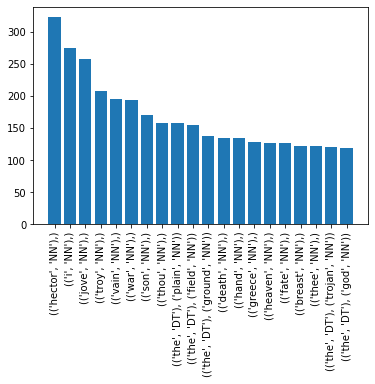

In [29]:
%matplotlib inline

plt.bar(range(len(X)), Y)

ax = plt.subplot()
ax.set_xticks(range(len(X)))
ax.set_xticklabels(X)
plt.xticks(rotation = 90)

In [30]:
VP_Chunks_Counter.most_common(20)

[((("'t", 'NN'), ('is', 'VBZ')), 19),
 ((('i', 'NN'), ('am', 'VBP')), 11),
 ((("'t", 'NN'), ('was', 'VBD')), 11),
 ((('the', 'DT'), ('hero', 'NN'), ('said', 'VBD')), 9),
 ((('i', 'NN'), ('know', 'VBP')), 8),
 ((('i', 'NN'), ('saw', 'VBD')), 8),
 ((('the', 'DT'), ('scene', 'NN'), ('lies', 'VBZ')), 7),
 ((('i', 'NN'), ('was', 'VBD')), 6),
 ((('view', 'NN'), ("'d", 'VBD')), 6),
 ((('confess', 'NN'), ("'d", 'VBD')), 6),
 ((('the', 'DT'), ('scene', 'NN'), ('is', 'VBZ')), 6),
 ((('i', 'NN'), ('felt', 'VBD')), 5),
 ((('i', 'NN'), ('bear', 'VBP')), 5),
 ((('press', 'NN'), ("'d", 'VBD')), 5),
 ((('hector', 'NN'), ('is', 'VBZ')), 5),
 ((('vain', 'NN'), ('was', 'VBD')), 5),
 ((('homer', 'NN'), ('was', 'VBD')), 4),
 ((('i', 'NN'), ('have', 'VBP')), 4),
 ((('hunger', 'NN'), ('was', 'VBD')), 4),
 ((('glory', 'NN'), ('lost', 'VBN')), 4)]

In [31]:
X, Y = map(list, zip(*VP_Chunks_Counter.most_common(20)))

/home/muhammad/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

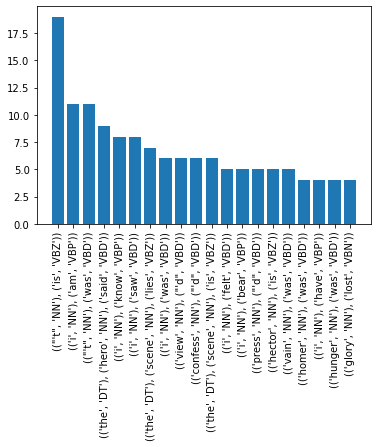

In [32]:
%matplotlib inline

plt.bar(range(len(X)), Y)

ax = plt.subplot()
ax.set_xticks(range(len(X)))
ax.set_xticklabels(X)
plt.xticks(rotation = 90)

## General Frequency Distribution

### Stop Words & Punctuations Removal 

In [33]:
stop_words = list(set(stopwords.words('english')))

In [34]:
words = [word for word in regexp_tokenize(text, pattern = "[\w'\.]+") if word not in stop_words]

In [35]:
frequency = {}

In [36]:
for token in words:
    if frequency.get(token):
        frequency[token] += 1
    else:
        frequency[token] = 1

In [37]:
frequency = {key: value for key, value in sorted(frequency.items(), key = lambda item: item[1], reverse = True)}

In [38]:
X = list(frequency.keys())

In [39]:
Y = list(frequency.values())

In [40]:
X = X[:20]

In [41]:
print(X)

['thy', 'thus', 'shall', 'great', 'arms', "o'er", 'hector', 'thou', 'jove', 'one', 'yet', 'achilles', 'gods', 'let', 'first', 'war', 'son', 'god', 'chief', 'troy']


In [42]:
Y = Y[:20]

In [43]:
print(Y)

[931, 606, 507, 454, 401, 353, 351, 340, 319, 302, 302, 285, 284, 279, 274, 268, 267, 259, 255, 243]


/home/muhammad/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

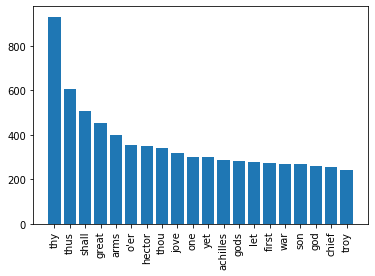

In [44]:
%matplotlib inline

plt.bar(range(len(X)), Y)

ax = plt.subplot()
ax.set_xticks(range(len(X)))
ax.set_xticklabels(X)
plt.xticks(rotation = 90)